# Tarea Examen 1

In [1]:
from pylab import *

1. El objetivo del siguiente problema es obtener la curva de convergencia de las integrales que se piden en los incisos de este problema. Para ello inicie con una partición de un segmento y vea el resultado de la integral, este primer segmento estará subdividido en 3 pedazos en el caso de ```Simp_3_8``` o en 4 en el caso de ```Bode```. Posteriormente divida la partición en 2 y obtenga el resultado de la integral. Repita este procedimiento de dividir la partición en 2 hasta obtener una precisión de $10^{-4}$, es decir, que el resultado de la integral no cambie en al menos las últimas 4 cifras. Realice en cada caso una gráfica del resultado de la integral contra el número de particiones en cada caso.

- Función ```Simp_3_8```: $\int ^{x_3} _{x_0} f(x)dx = \frac{3h}{8}(f_0 + 3f_1 + 3f_2 + f_3)$
- Función ```Bode```: $\int ^{x_4} _{x_0} f(x)dx = \frac{2h}{45}(7f_0 + 32f_1 + 12f_2 + 32f_3 + 7f_4)$

In [2]:
def particion(a,b,salto,n=1):
    return linspace(a,b,salto*n+1)

def Simp_3_8(f,x):
    n , h , int_f = int((len(x)-1)/3) , x[1]-x[0] , 0
    for i in range(n):
        int_f += f[3*i] + 3*f[3*i+1] + 3*f[3*i+2] + f[3*i+3]
    return int_f*0.375*h

def Bode(f,x):
    n , h , int_f = int((len(x)-1)/4) , x[1]-x[0] , 0
    for i in range(n):
        int_f += 7*f[4*i] + 32*f[4*i+1] + 12*f[4*i+2] + 32*f[4*i+3] + 7*f[4*i+4]
    return int_f*(2/45)*h

def convergencia(funcion,a,b,salto,error=1e-4):
    iteraciones , resultados , n = [0] , [] , 0
    x = particion(a,b,salto)
    f = funcion(x)
    if salto == 3:
        resultados.append(Simp_3_8(f,x))
    elif salto == 4:
        resultados.append(Bode(f,x))
    else:
        print(r'Parición equivocada')
    diferencia = 1
    while diferencia >= error:
        n += 1
        iteraciones.append(n)
        x = particion(a,b,salto,n+1)
        f = funcion(x)
        if salto == 3:
            resultados.append(Simp_3_8(f,x))
        elif salto == 4:
            resultados.append(Bode(f,x))
        diferencia = abs( resultados[n] - resultados[n-1] )
    return iteraciones,resultados

a) $\int _0 ^1 \frac{dx}{1+x^2} = \frac{\pi}{4}$

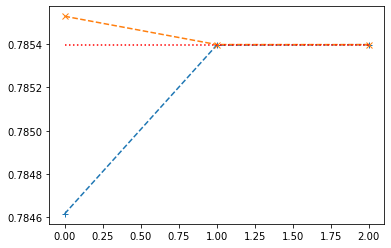

In [3]:
def inciso_a(x):
    return 1/(1+x**2)

it_s , res_s = convergencia(inciso_a,0,1,3)
it_b , res_b = convergencia(inciso_a,0,1,4)
plot(it_s , res_s,'+--')
plot(it_b , res_b,'x--')
hlines(pi/4,0,max(it_s[-1],it_b[-1]),ls='dotted',color='red')
show()

b) $\int _0 ^3 \frac{dx}{1+x^3}$

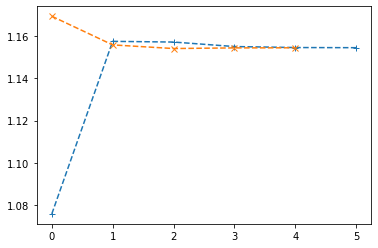

In [4]:
def inciso_b(x):
    return 1/(1+x**3)

it_s , res_s = convergencia(inciso_b,0,3,3)
it_b , res_b = convergencia(inciso_b,0,3,4)
plot(it_s , res_s,'+--')
plot(it_b , res_b,'x--')
show()

c) $\int _0 ^{0.4} \sin (x^2)dx$

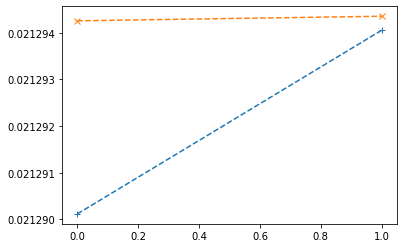

In [5]:
def inciso_c(x):
    return sin(x**2)

it_s , res_s = convergencia(inciso_c,0,0.4,3)
it_b , res_b = convergencia(inciso_c,0,0.4,4)
plot(it_s , res_s,'+--')
plot(it_b , res_b,'x--')
show()

d) $\int _2 ^4 \frac{dx}{\ln (x)}$

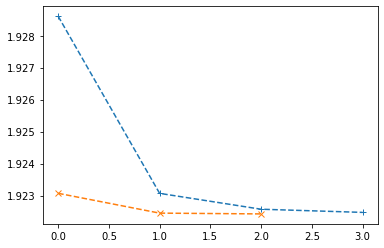

In [6]:
def inciso_d(x):
    return 1/log(x)

it_s , res_s = convergencia(inciso_d,2,4,3)
it_b , res_b = convergencia(inciso_d,2,4,4)
plot(it_s , res_s,'+--')
plot(it_b , res_b,'x--')
show()

e) $\int _0 ^1 x e^{-x} dx$

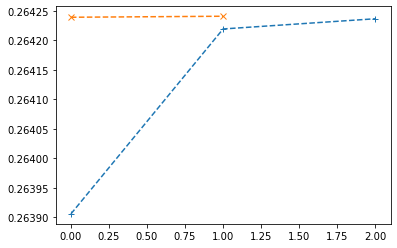

In [7]:
def inciso_e(x):
    return x*exp(-x)

it_s , res_s = convergencia(inciso_e,0,1,3)
it_b , res_b = convergencia(inciso_e,0,1,4)
plot(it_s , res_s,'+--')
plot(it_b , res_b,'x--')
show()

2. Sabemos que la definición de la función Logaritmo es $\int _1 ^x \frac{dt}{t} = \ln (x)$. Construya una función que calcule la función Logaritmo utilizando la definición de la integral. El cálculo de la integral debe tener una precisión de al menos $10^{-4}$. Para corroborar los resultados, realice la gráfica de $\ln (x)$ en el intervalo $[0.1 , 1000]$ y compare contra la función que viene en Python. Tu función debe llamarse ```mi_ln(x)``` y debe calcular el valor o los valores de ```x```  independientemente si la entrada es un número o el un arreglo de números.

In [8]:
def mi_ln(x):
    #primero revisemos si tenesmo un número o un arreglo para que finalmente utilicemos un arreglo
    if type(x)==int or type(x)==float:
        x = array([x])
    else:
        x = array(x)
    milog = zeros_like(x,dtype=float)
    for i in range(len(x)):
        n_part = int(len(arange(1,x[i],0.25))/4) + 1
        x_in = particion(1,x[i],4,n_part)
        f_1x = 1/x_in
        milog[i] = Bode(f_1x,x_in)
    return milog

In [9]:
print(mi_ln(e),log(e))

[1.0000131] 1.0


In [10]:
x = linspace(0.1,1000)
mi_F = mi_ln(x)
py_F = log(x)
print('Maxima diferencia en todo el intervalo',abs(mi_F-py_F).max())

Maxima diferencia en todo el intervalo 0.08311533560960882


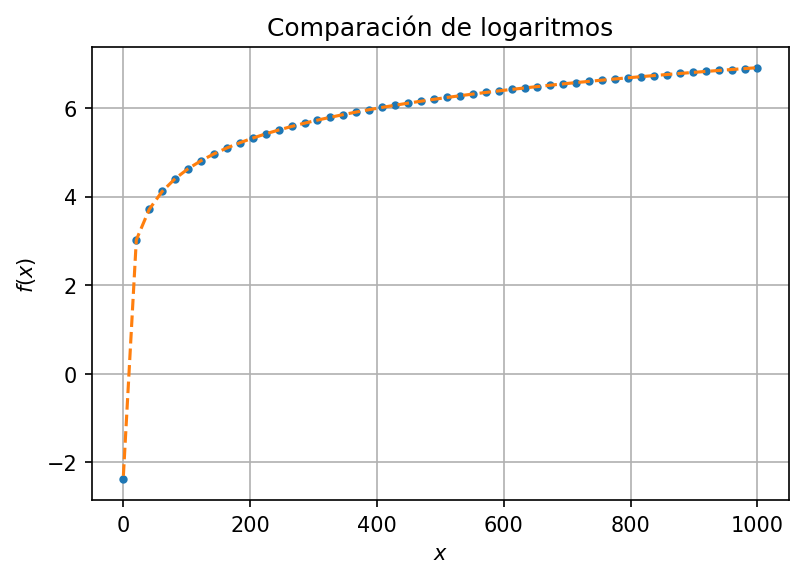

In [11]:
figure(dpi=150)
title('Comparación de logaritmos')
plot(x,mi_F,'.',label='mi_ln')
plot(x,py_F,'--',label='log Python')
xlabel(r'$x$'),ylabel(r'$f(x)$')
grid()
show()